In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score





In [2]:
# Load the built-in Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Map numeric targets to names
df['species'] = df['species'].map({0:'setosa', 1:'versicolor', 2:'virginica'})

# Display first few rows
print("Iris Dataset:")
print(df.head())

Iris Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


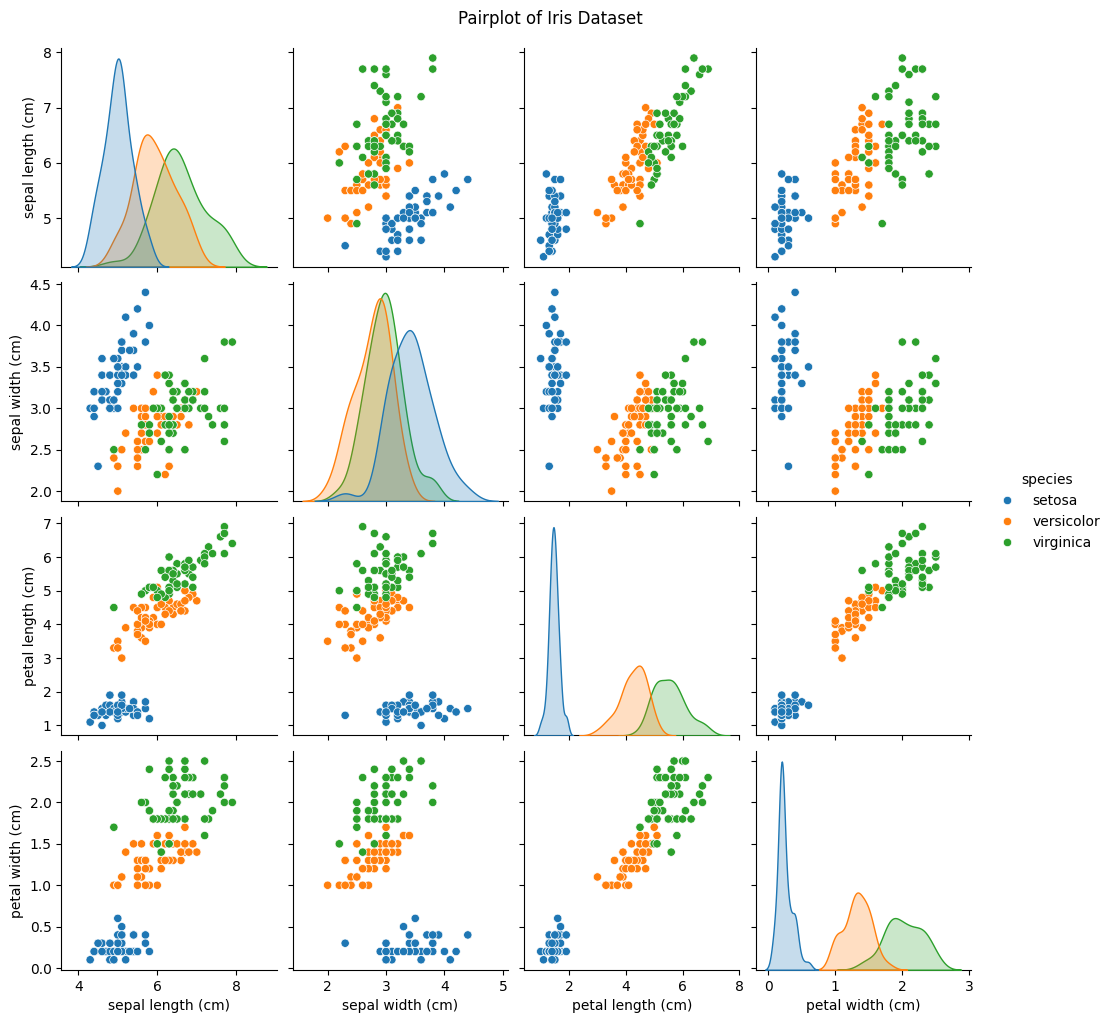

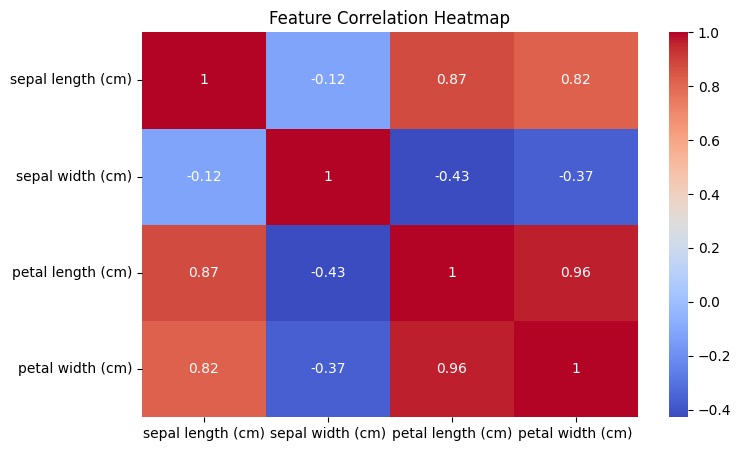

In [3]:
# ================= Visualization =================
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

plt.figure(figsize=(8, 5))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()



In [4]:
# ================= Data Preparation =================
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ================= KNN Classifier =================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# ================= Decision Tree Classifier =================
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# ================= Evaluation Function =================
def evaluate_model(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    
    # Specificity (per class, then average)
    TN = []
    FP = []
    for i in range(len(np.unique(y_test))):
        tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
        fp = np.sum(cm[:, i]) - cm[i, i]
        TN.append(tn)
        FP.append(fp)
    specificity = np.mean(np.array(TN) / (np.array(TN) + np.array(FP)))
    
    print(f"\n===== {model_name} Evaluation =====")
    print("Confusion Matrix:\n", cm)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")

# Evaluate both models
evaluate_model(y_test, y_pred_knn, "KNN Classifier")
evaluate_model(y_test, y_pred_dt, "Decision Tree Classifier")



===== KNN Classifier Evaluation =====
Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  4 11]]
Accuracy: 0.9111
Precision: 0.9298
Recall (Sensitivity): 0.9111
Specificity: 0.9556

===== Decision Tree Classifier Evaluation =====
Confusion Matrix:
 [[15  0  0]
 [ 0 12  3]
 [ 0  1 14]]
Accuracy: 0.9111
Precision: 0.9155
Recall (Sensitivity): 0.9111
Specificity: 0.9556
